# Grundlagen

<!-- TODO: Hier fehlt eine kurze Einführung in die numerische Mathematik -->

## Kontinuierlich vs. Diskret

### Kontinuierliche Funktionen / Prozesse

Physikatische Grössen sind sehr häufig **kontinuierlich**, d.h. sie ändern sich nicht sprunghaft. Beispiele:

- Temperatur einer Flüssigkeit
- Konzentration einer eines Stoffes in einer Lösung
- Leistung einer Batterie
- Dauer eines Prozessschritts

In der Mathematik sprechen wir dann von **stetigen** Funktionen. Dabei macht ein **stetiger** Funktionsgraph **keine Sprünge** und hat **keine Lücken**.

Als Beispiel betrachten wir die Funktion

$$ f(x) = x^2 e^{-x} $$

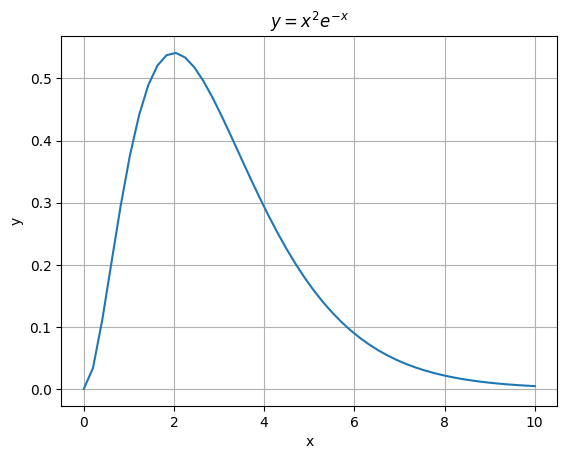

In [7]:
import numpy as np
import matplotlib.pyplot as plt #pyplot muss immer importiert sein

x = np.linspace(0, 10) # num = 100 -> punkte hinzufügen
y = x**2 * np.exp(-x)

plt.plot(x, y)
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("$y = x^2 e^{-x}$") #mathematische Schreibweise LateX
plt.show()


*Bemerkung:* Berechnet man die Funktion nur an an wenigen Stellen, so wird ersichtlich, dass [`matplotlib.pyplot.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) die Punkte mit Geraden miteinander verbindet, also **linear interpoliert**. Für kontinuierliche Funktionen ist dies sinnvoll, weil ja wirklich alle Werte zwischen zwei Punkten irgendwann mal angenommen werden (Zwischenwertsatz).

### Diskrete Funktionen / Prozesse

Andere Grössen können nur **spezifische Werte** (meist ganze Zahlen) annehmen. Wir sprechen von **diskreten Werten**. Beispiele:

**-> bestimmte Werte, keine Werte dazwischen. Ohne Dezimalzahlen!**

- Anzahl Bäume in einem Waldstück
- Anzahl weisse Blutkörperchen in einer Blutprobe
- Anzahl Sterne im Blickfeld eines Fernrohrs
- Energieniveaus von Elektronen in Atomen

Die entsprechenden mathematischen Funktionen können **nur ganzzahlige Werte** annehmen (Wertebereich $W\subseteq\mathbb{Z}$), müssen daher **Sprungstellen** haben und können somit **nicht stetig** sein.

Als Beispiel simulieren wir einen stochastischen Prozess, bei dem sich der diskrete Zustand $z$ an zufälligen Zeitpunkten $t$ ändert. Dies könnte z.B. die Anzahl Personen in einem Raum im Zeitverlauf sein. Hier ist die Zeit kontinuierlich und der Zustand diskret. 

**Stochastik -> Zufällige Werte** 

In [11]:
# Zufällige zahlen generieren 
rng = np.random.default_rng(42)
rng.uniform(high=1, size=10)

array([0.77395605, 0.43887844, 0.85859792, 0.69736803, 0.09417735,
       0.97562235, 0.7611397 , 0.78606431, 0.12811363, 0.45038594])

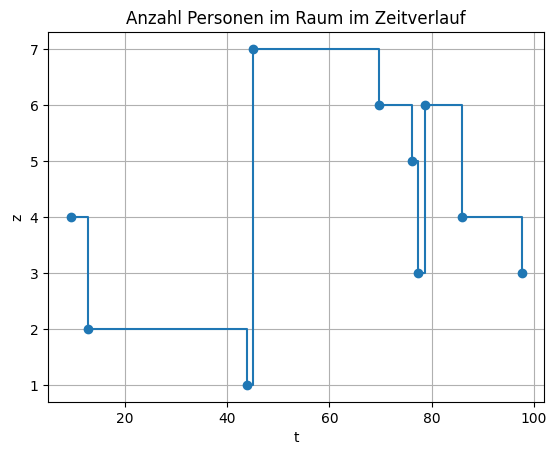

In [13]:
rng = np.random.default_rng(42) # rng -> random number generator
t = np.sort(rng.uniform(high=100, size=10))
z = rng.integers(low=0, high=8, size=len(t))

plt.step(t, z, "o-", where="post") # step für diskrete funktionen -> sprunghaft
plt.grid()
plt.xlabel("t")
plt.ylabel("z")
plt.title("Anzahl Personen im Raum im Zeitverlauf")
plt.show()


*Bemerkung:* Für die Darstellung einer diskreten Funktion benutzen wir [`matplotlib.pyplot.step`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.step.html), weil Sprünge als senkrechte Linien darstellt werden, anstatt die Punkte diagonal zu verbinden (also linear zu interpolieren) wie dies [`matplotlib.pyplot.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) macht.

### Folgen / Iterative Prozesse

Schliesslich gibt es auch Prozesse, die mit konstanten (diskreten) Schritten verlaufen. Hier ist der Fortschritt des Prozesses eine Anzahl Schritte, auch **Iterationen (einer Schritte in x-Richtung)** genannt. In manchen Fällen sind dies Zeitschritte gleicher Schrittlänge, in anderen Fällen aber auch nicht. Solche Prozesse sind aus der Mathematik als **Folgen** bekannt.

Ein Beispiel ist die [**logistische Gleichung**](https://de.wikipedia.org/wiki/Logistische_Gleichung)

$$ x_{n+1} = r x_n (1 - x_n) $$

Sie ist ein Modell von beschränktem Populationswachstum mit einer Wachstumsrate $r$. Für $r$-Werte grösser als ca. 3.6 kann die Folge spannendes chaotisches Verhalten zeigen.


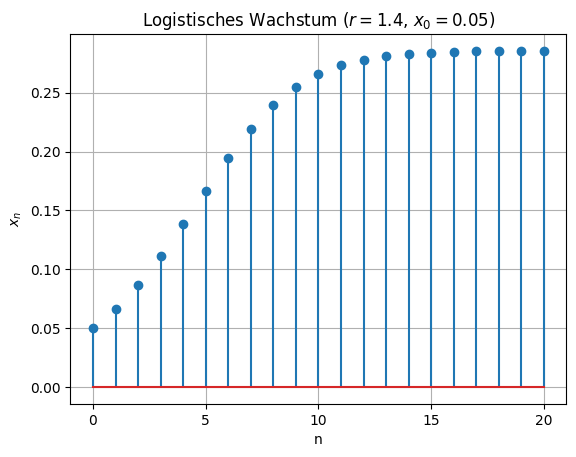

In [15]:
r = 1.4     # Startwert
x0 = 0.05   # Wachstumsrate
N = 20      # Anzahl Schritte

xn = x0
x = [x0]
for n in range(N):
    xn = r * xn * (1 - xn)
    x.append(xn)

fig, ax = plt.subplots()
ax.stem(x)
# ax.plot(x, 'o')
ax.xaxis.set_ticks(np.arange(N + 1, step=round(N / 4)))
ax.grid()
ax.set_xlabel("n")
ax.set_ylabel("$x_n$")
plt.title(f"Logistisches Wachstum ($r={r}$, $x_0={x0}$)")
plt.show()


Hier sind die $n$-Werte auf der horizontalen Achse **diskret** und $x_n$-Werte auf der vertikalen Achse **kontinuierlich**. Das heisst, zwischen den dargestellten Punkten werden existieren keine weiteren Punkte. Darum sollten die Punkte auch nicht verbunden werden. Daher wird hier die Funktion  [`matplotlib.pyplot.stem`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html) benutzt, welche dies mit den senkrechten Stäben etwas verdeutlicht. Alternativ können auch einfach nicht-verbundene Punkte verwendet werden: `plt.plot(x, 'o')`.

### Daten

Data Scientists arbeiten häufig mit Daten und nicht nur mit Modellen, die in Form von stetigen, stochastischen oder iterativen Prozessen daher kommen. Daten sind allerdings Beobachtungen von Variablen, deren Ausprägungen entweder kontinuierlich oder diskret sind, siehe *Skalenniveau* im Modul *Daten und Information*. Beim Darstellen von und Rechnen mit Daten ist es daher wichtig, die geeigneten Tools und Methoden einzusetzen.


## Zahlendarstellung

Wir werfen einen kleinen Blick auf die Darstellung von Zahlen im Computer, um etwas besser zu verstehen, wie genau oder eben ungenau Computer rechnen können.

### Dezimalsystem, Binärsystem, b-adisches System

Die Zahl **173** lässt sich im **Dezimalsystem** schreiben als

$$ 173 = 1 \cdot 10^2 + 7 \cdot 10^1 + 3 \cdot 10^0 $$

Analog funktioniert das **Binärsystem**, in dem ein Computer Zahlen darstellen und damit rechnen kann:

$$ 1101_{(2)} = 1 \cdot 2^3 + 1 \cdot 2^2 + 0 \cdot 2^1 + 1 \cdot 2^0 = 13_{(10)} $$

Allgemein können reelle Zahlen $x\in\mathbb{R}$ bezüglich einer beliebigen Basis $b\in \mathbb{N}$ mit $b\geq 2$ dargestellt werden

$$ x = \pm \sum_{j=-\infty}^\infty z_k \cdot b^k $$

Hier sind $z_k\in\{0,1,\ldots,b-1\}$ die Ziffern. Für ein allgemeine Basis $b$ spricht man vom **b-adischen Stellenwertsystem**.

Noch ein Beispiel im Binärsystem ($b=2$ und $z_k\in\{0,1\}$): Wir können auch binäre (oder dyadische) Brüche darstellen

$$
\begin{align*}
100110.01_{(2)}
&= 1 \cdot 2^5 &&+ 0 \cdot 2^4 &&+ 0 \cdot 2^3 &&+ 1 \cdot 2^2 &&+ 1 \cdot 2^1 &&+ 0 \cdot 2^0 &&+ 0 \cdot 2^{-1} &&+ 1 \cdot 2^{-2} \\
&= 1 \cdot 32 &&+ 0 \cdot 16 &&+ 0 \cdot 8 &&+ 1 \cdot 4 &&+ 1 \cdot 2 &&+ 0 \cdot 1 &&+ 0 \cdot \frac{1}{2} &&+ 1 \cdot \frac{1}{4} \\
&= 32 &&+ 0 &&+ 0 &&+ 4 &&+ 2 &&+ 0 &&+ \frac{1}{4} \\
&= 38.25_{(10)}
\end{align*}
$$


Die Umrechnung vom Binär- ins Dezimalsystem geschieht über die fortgesetzte Division mit Rest. Als Beispiel nehmen wir $x=12.5_{(10)}$:

1. Suche den grössten Exponenten $n$ mit $2^n \leq x$. Wir finden $n=3$, weil $2^3 = 8 < x$ und $2^4 = 16 > x$.

2. Die erste 1 in der gesuchten Binärdarstellung ist also an 4. Stelle, $1000_{(2)}$, da zuhinterst die 0. Stelle ist.

3. Wir wiederholen den Vorgang mit dem Rest $x_1 = x - 2^n = 12.5 - 8 = 4.5$: Wir finden $n=2$ mit $2^2 = 4 = 100_{(2)}$.

4. Und nochmals mit dem $x_2 = x_1 - 2^n = 4.5 - 4 = 0.5$: Wir finden $n=-1$ mit $2^{-1} = 0.5 = 0.1_{(2)}$.

Alles in allem erhalten wir:

$$ x = 12.5_{(10)} = 1000_{(2)} + 100_{(2)} + 0.1_{(2)} = 1100.1_{(2)} $$

Weitere Beispiele sind hier zu finden:

- [Video "p-adische Zahlendarstellung - Daten- und Zeichendarstellung 2", simpleclub](https://youtu.be/WzqlPXslQL8)
- [Numerik 1, Wikiversity](https://de.wikiversity.org/wiki/Kurs:Numerik_I/Besonderheiten_des_numerischen_Rechnens#Bemerkung_-_Umrechnungsverfahren)

### Gleitkommadarstellung (Floating Point)

In Computern wird mit der Festkommadarstellung reeller Zahlen gearbeitet:

$$ x = v \cdot m \cdot b^e $$

Da der Speicher endlich ist, kann nur eine gewisse Anzahl Bits (binäre Ziffern) verwendet werden. Eine Konvention ist die Folgende (IIEEE 754 double):

| Symbol | Bezeichnung | Bereich               | Bits |
|--------|-------------|-----------------------|-----------|
| $v$    | Vorzeichen  | $\{+1, -1\}$          | 1         |
| $m$    | Mantisse    | $\mathbb{N}_0$        | 52        |
| $b$    | Basis       | $\mathbb{N} /  \{1\}$ |           |
| $e$    | Exponent    | $\mathbb{Z}$          | 11        |


- 52 Bit für die Mantisse bedeutet, dass die grösste darstellbare Mantisse $m_\text{max} = 2^{52} - 1 \approx 10^{52\lg(2)}$ ist. Das ist eine **Dezimalzahl mit ca. 16 Stellen**.
- Weil der Exponent auch negativ sein kann, wird eines der 11 Bits für das Vorzeichen verwendet. Die restlichen 10 Bit ergeben den maximalen Exponenten $2^{10} - 1 = 1023$ zur Basis 2, was ca. $1023\lg(2)\approx 308$ als Exponenten zur Basis 10 entspricht.

Die Diskussion hier ist etwas vereinfacht, reicht aber für das Grundverständnis. Mehr Details finden sich hier:

- [Gleitkommazahl, Wikipedia](https://de.wikipedia.org/wiki/Gleitkommazahl)
- [IEEE_754-2008, Wikipedia](https://de.wikipedia.org/wiki/IEEE_754-2008)
- [Numerik 1, Wikiversity](https://de.wikiversity.org/wiki/Kurs:Numerik_I/Besonderheiten_des_numerischen_Rechnens#Rechnen_auf_einem_Computer)

In [9]:
52*np.log10(2), 1023*np.log10(2)

(15.653559774527022, 307.9536855642528)

#### Lernaufgabe 1: Kleinste Zahl

Finde heraus, welches (ungefähr) die kleinste darstellbare Gleitkommazahl ist, indem Du die Zahl 1 immer wieder durch 2 teilst, bis das Ergebnis nicht mehr grösser Null ist. (While-Schleife verwenden!)

In [22]:
x = 1 
while x > 0:
     x = x / 2
     print(x)

0.5
0.25
0.125
0.0625
0.03125
0.015625
0.0078125
0.00390625
0.001953125
0.0009765625
0.00048828125
0.000244140625
0.0001220703125
6.103515625e-05
3.0517578125e-05
1.52587890625e-05
7.62939453125e-06
3.814697265625e-06
1.9073486328125e-06
9.5367431640625e-07
4.76837158203125e-07
2.384185791015625e-07
1.1920928955078125e-07
5.960464477539063e-08
2.9802322387695312e-08
1.4901161193847656e-08
7.450580596923828e-09
3.725290298461914e-09
1.862645149230957e-09
9.313225746154785e-10
4.656612873077393e-10
2.3283064365386963e-10
1.1641532182693481e-10
5.820766091346741e-11
2.9103830456733704e-11
1.4551915228366852e-11
7.275957614183426e-12
3.637978807091713e-12
1.8189894035458565e-12
9.094947017729282e-13
4.547473508864641e-13
2.2737367544323206e-13
1.1368683772161603e-13
5.684341886080802e-14
2.842170943040401e-14
1.4210854715202004e-14
7.105427357601002e-15
3.552713678800501e-15
1.7763568394002505e-15
8.881784197001252e-16
4.440892098500626e-16
2.220446049250313e-16
1.1102230246251565e-16
5.55

## Fehlertypen

### Darstellungsfehler


Bei der Darstellung von Zahlen im Computer ergeben sich Rundungsfehler, weil nicht unendlich viel Speicher zur Verfügung steht. Stellt man die Zahl $x$ im Computer dar, so wird effektiv auf die nächstgelegene exakt darstellbare Zahl $\text{rd}(x)$ gerundet. Der relative Rundungsfehler beträgt $rd(x) - x$. Der relative Fehler

**z.B würde man Pi nehmen ist die maximale genauigkeit bis zu maximal 16 Stellen, der Rest wird als Exponennt dargestellt und gerundet**

$$ \varepsilon = \frac{rd(x) - x}{x} $$

ist duch die **Maschinenpräzision** gegeben und hängt direkt mit der Anzahl Bits für die Mantisse in der Gleitkommadarstellung zusammen. Mit $r$ Bits für die Mantisse und der Basis $b$ ist

$$ \left| \varepsilon \right| \leq eps = \frac{1}{2} b^{1-r} $$

Für 64-bit Gleitkommazahlen (`float64`) ergibt sich $eps \approx 10^{-16}$.

In [23]:
b, r = 2, 53
# b, r = 10, 16
b**(1 - r) / 2

1.1102230246251565e-16

#### Lernaufgabe 2: Genauigkeit der Mantisse

Finde ähnlich wie bei Aufgabe 1 heraus, welches (ungefähr) die kleinste Gleitkommazahl ist, die von 1 unterschieden werden kann.

In [29]:
# 2.
x = 1 
while 1 + x > 1:
    x = x / 2
    print(x)

0.5
0.25
0.125
0.0625
0.03125
0.015625
0.0078125
0.00390625
0.001953125
0.0009765625
0.00048828125
0.000244140625
0.0001220703125
6.103515625e-05
3.0517578125e-05
1.52587890625e-05
7.62939453125e-06
3.814697265625e-06
1.9073486328125e-06
9.5367431640625e-07
4.76837158203125e-07
2.384185791015625e-07
1.1920928955078125e-07
5.960464477539063e-08
2.9802322387695312e-08
1.4901161193847656e-08
7.450580596923828e-09
3.725290298461914e-09
1.862645149230957e-09
9.313225746154785e-10
4.656612873077393e-10
2.3283064365386963e-10
1.1641532182693481e-10
5.820766091346741e-11
2.9103830456733704e-11
1.4551915228366852e-11
7.275957614183426e-12
3.637978807091713e-12
1.8189894035458565e-12
9.094947017729282e-13
4.547473508864641e-13
2.2737367544323206e-13
1.1368683772161603e-13
5.684341886080802e-14
2.842170943040401e-14
1.4210854715202004e-14
7.105427357601002e-15
3.552713678800501e-15
1.7763568394002505e-15
8.881784197001252e-16
4.440892098500626e-16
2.220446049250313e-16
1.1102230246251565e-16


In [30]:
# 2.
x = 2 
y = 1 
while x > 1:
    x = x ** (1 / y) 
    y += 1 
    print(x)

2.0
1.4142135623730951
1.122462048309373
1.029302236643492
1.0057929410678534
1.0009631679660835
1.0001375386600664
1.0000171912980802
1.0000019101296367
1.0000001910127996
1.0000000173647985
1.0000000014470665
1.0000000001113127
1.000000000007951
1.00000000000053
1.000000000000033
1.000000000000002
1.0


Als Beispiele für Darstellungsfehler
Beispiel: Die Dezimalzahl 0.1 kann nicht exakt im Binärsystem dargestellt werden. Das führt dazu, dass sich z.B. bei der Multiplikation mit 3 bereits ein Rundungsfehler ergibt:

In [31]:
(0.1 * 3 - 0.3) / 0.3


1.8503717077085943e-16

### Rechenfehler (Gleitkomma-Arithmetik)

Das Resultat einer Rechnung Gleitkommazahlen im Computer führt nicht zwingend wieder zu einer exakt darstellbaren Gleitkommazahl. Es entstehen wieder Rundungsfehler. Die Addition und die Multiplikation sind dabei nicht problematisch, weil die relativen Fehler nur addiert werden.

Bei der Subtraktion zweier etwa gleich grosser Zahlen können die Rundungsfehler sehr relevant werden. Es ergibt sich Phänomen der **Auslöschung** von korrekten Stellen.

Numerische Algorithmen sollten daher mit Blick auf die **Stabilität** entwickelt werden. Das heisst, es darf keine unkontrollierbare Verfälschung des Resultats zur Rundungsfehler Gleitkommaarithmetik vorkommen. Dies ist ein wichtiger bereich der **Numerik**.

Mehr zum Thema: [Numerik 1, Wikiversity](https://de.wikiversity.org/wiki/Kurs:Numerik_I/Besonderheiten_des_numerischen_Rechnens#1.3_Stabilit%C3%A4t_und_Kondition)

### Diskretisierungsfehler


Misst man mit einem Sensor eine kontinuierliche physikalische Grösse und übersetzt diese mit einem Analog-Digital-Konverter in ein digitales Signal, so wird der Wert **diskretisiert**. Wie bei der Zahlendarstellung im Computer entstehen Rundungsfehler.

Hier ein Beispiel:

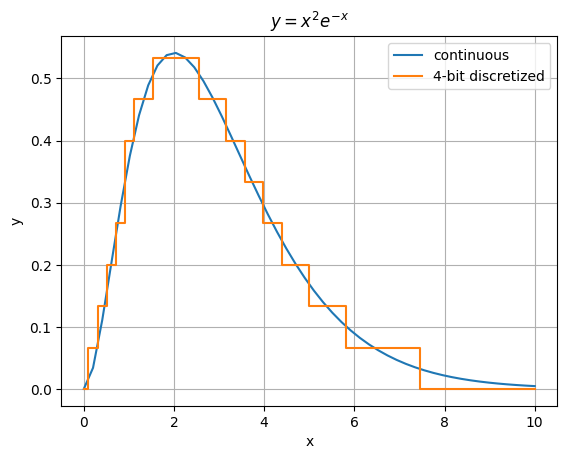

In [32]:
x = np.linspace(0, 10)
y_cont = x**2 * np.exp(-x)

bits = 4
max_val = 1
scale = (2**bits - 1) / max_val
y_discrete = np.round(scale * y_cont) / scale

plt.plot(x, y_cont, label="continuous")
plt.step(x, y_discrete, where="mid", label=f"{bits}-bit discretized")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"$y = x^2 e^{-x}$")
plt.legend()
plt.show()


### Messfehler

Natürlich gibt es dann auch noch Messfehler. Darum kümmert man sich mit statistischen Methoden. Es darf bei der Berechnung von Resultaten auf Basis von Messdaten aber nicht vergessen werden, dass die Daten Messfehler enthalten.